## Machine Learning Competition Notebook Template

### Student Name : 

**Name Surname ID**  


#### Summary
Please write here the summary of your implementation(s).

### load datasets

In [1]:
import pandas as pd
import sklearn as sk
import plotly as pl
import matplotlib
import matplotlib.pyplot as plt
import math
import patsy as patsy
from scipy import stats
import pickle
import statsmodels.api as sm
import numpy as np 
import seaborn as sns
from dython import nominal
import folium
from folium import Map
from folium.plugins import HeatMap

import functions as f

dftrain = pd.read_csv("/Users/andrewtobin/College/final_year/FYP/House_pricing_dataset-master/dataset_csv/train.csv",index_col='ad_id')
dftest  = pd.read_csv( "/Users/andrewtobin/College/final_year/FYP/House_pricing_dataset-master/dataset_csv/test.csv",index_col='ad_id')

In [205]:
pd.set_option('precision', 2)
# Setting the pandas output display options
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 150)

### Getting acquainted with our data

In [2]:
## Column Names
print("Training Data Info:")
dftrain.info() ## column names, count of non-null values, variable types

print("\n Descriptive Statistics for Numeric Data")
dftrain.describe() ## descriptive statistics for our numeric data

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2982 entries, 996887 to 12428358
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area                2982 non-null   object 
 1   bathrooms           2931 non-null   float64
 2   beds                2931 non-null   float64
 3   ber_classification  2305 non-null   object 
 4   county              2982 non-null   object 
 5   description_block   2982 non-null   object 
 6   environment         2982 non-null   object 
 7   facility            965 non-null    object 
 8   features            2982 non-null   object 
 9   latitude            2982 non-null   float64
 10  longitude           2982 non-null   float64
 11  no_of_units         59 non-null     float64
 12  price               2892 non-null   float64
 13  property_category   2982 non-null   object 
 14  property_type       2931 non-null   object 
 15  surface             2431 n

,bathrooms,beds,latitude,longitude,no_of_units,price,surface
count,2931.000000,2931.000000,2982.000000,2982.000000,59.000000,2.892000e+03,2431.000000
mean,1.998635,2.979188,53.355991,-6.257175,7.440678,5.323536e+05,318.851787
std,1.291875,1.468408,0.086748,0.141906,8.937081,5.678148e+05,4389.423136
min,0.000000,0.000000,51.458439,-6.521183,0.000000,1.999500e+04,3.400000
25%,1.000000,2.000000,53.298929,-6.314064,2.000000,2.800000e+05,74.100000
50%,2.000000,3.000000,53.345497,-6.252254,3.000000,3.800000e+05,100.000000
75%,3.000000,4.000000,53.388845,-6.196049,8.000000,5.750000e+05,142.000000
max,18.000000,27.000000,53.630588,-1.744995,36.000000,9.995000e+06,182108.539008


In [114]:
## checking for duplicate rows
duplicates = dftrain[dftrain.duplicated()]
print(len(duplicates))
## no duplicates 

0


In [ ]:
## checking for rows with NANs
dftrain.isnull().sum(axis = 0)

## checking whether its all new development parent ads that are null or if its sale ads
#dftrain.loc[dftrain['price'].isnull(), 'property_category']

In [ ]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in dftrain.columns:
    print('{} : {}'.format(col,dftrain[col].unique()))

In [ ]:
## checking the number of unique values for each column
for col in dftrain.columns:
    print(col, len(dftrain[col].unique()))

Text(0.5, 1.0, 'Count by Property Type')

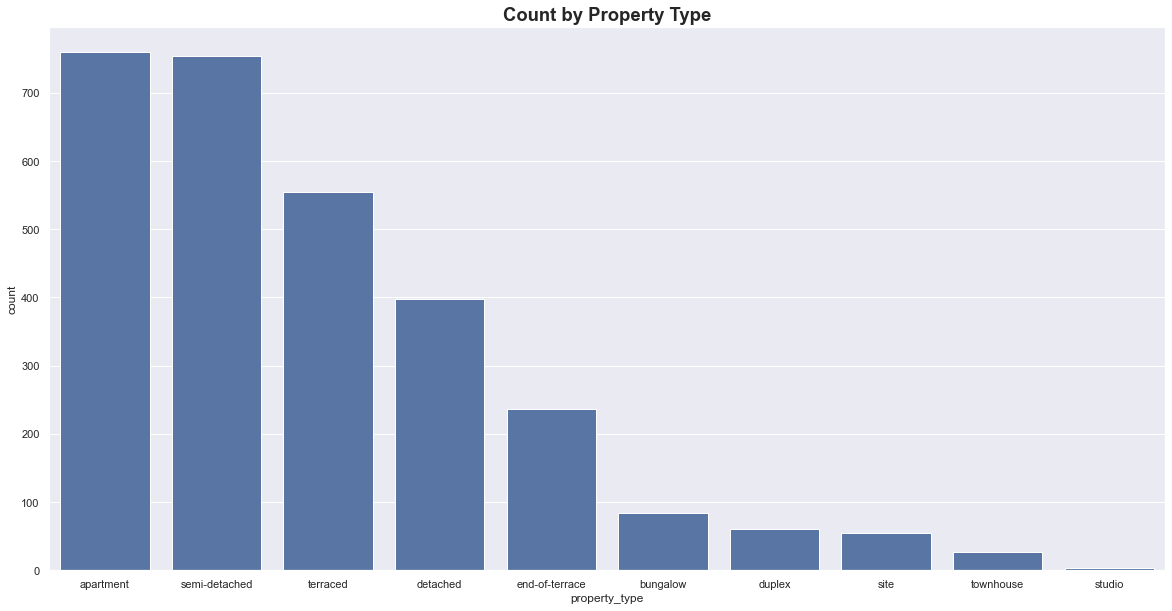

In [237]:
## property type breakdown
fig, axes = plt.subplots(1, figsize=(20,10), sharey=False)
sns.countplot(data=dftrain, x='property_type', color='b', order=dftrain['property_type'].value_counts().index)
axes.set_title('Count by Property Type', weight='bold', fontsize=18.5)

In [249]:
dftrain['ber_classification'] = dftrain['ber_classification'].str.replace('SINo666of2006exempt', 'BER Exempt')
dftrain =dftrain.drop(['county', 'environment', 'description_block', 'features'], axis = 1)

Text(0.5, 1.0, 'Count by BER Classification')

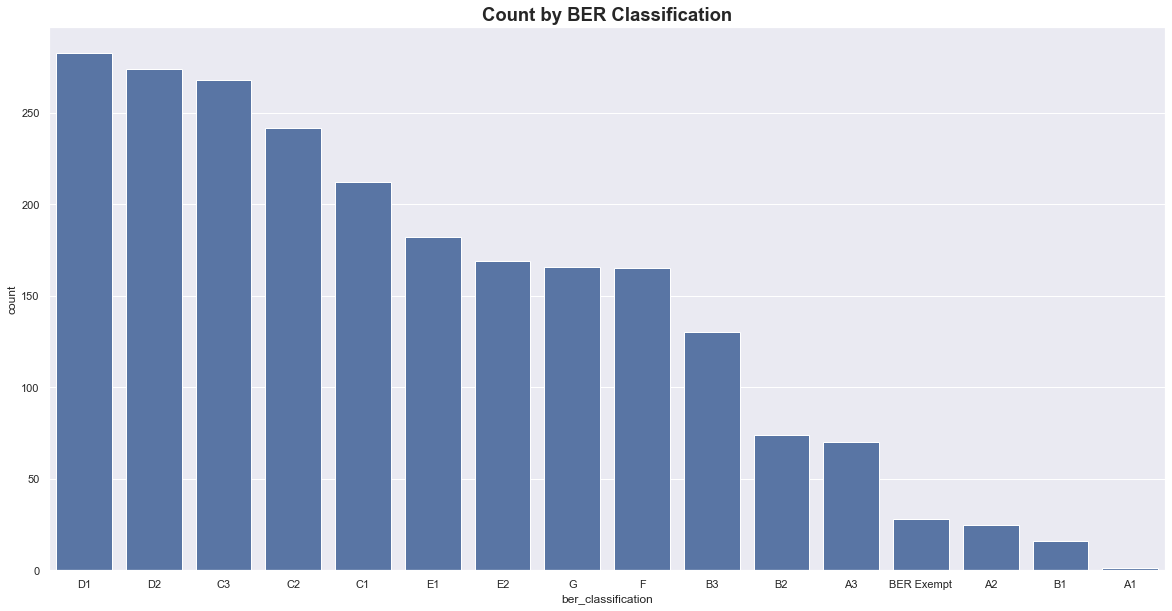

In [242]:
## BER Breakdown
fig, axes = plt.subplots(1, figsize=(20,10), sharey=False)
sns.countplot(data=dftrain, x='ber_classification', color='b', order=dftrain['ber_classification'].value_counts().index)
axes.set_title('Count by BER Classification', weight='bold', fontsize=18.5)

In [ ]:
print('Property Type Breakdowns\n',dftrain['property_type'].value_counts(), '\n')
print('BER Classification Breakdowns\n',dftrain['ber_classification'].value_counts())

In [ ]:
## checking unique values in each column, allow us to determine data consistency
for col in dftrain.columns:
    print(col, dftrain[col].unique(), '\n==================================================================')

In [209]:
facility_dummy = f.split_facility(dftrain)

In [210]:
## merging the facility dummy matrix with the dftrain df and dropping dropping facility variable
dftrain = pd.merge(dftrain, facility_dummy, on='ad_id')
dftrain = dftrain.drop('facility', axis = 1)

### Relationship between variables

In [ ]:
## extracting numeric values to check their correlation
dfnum = dftrain.select_dtypes(include='float64')
dfnum.columns
corrMatrix = dfnum.corr()
sns.set(rc = {'figure.figsize':(15,12)})
corrplot = sns.heatmap(corrMatrix, annot=True)
corrplot.set_title('Correlation Matrix for Numeric Variables', weight = 'bold').set_fontsize(18)

In [ ]:
## strength of association for all variables
## Uses Pearson's R for continuous-continuous
## Uses Correlation Ratio for categorical-continuous
## Uses Cramer's V or Theil's U for categorical-categorical
nominal.associations(dftrain, mark_columns=True, title='Strength of Association for all Variables');

#### Boxplots for Categorical-Continuous Relationships

<AxesSubplot:xlabel='property_type', ylabel='price'>

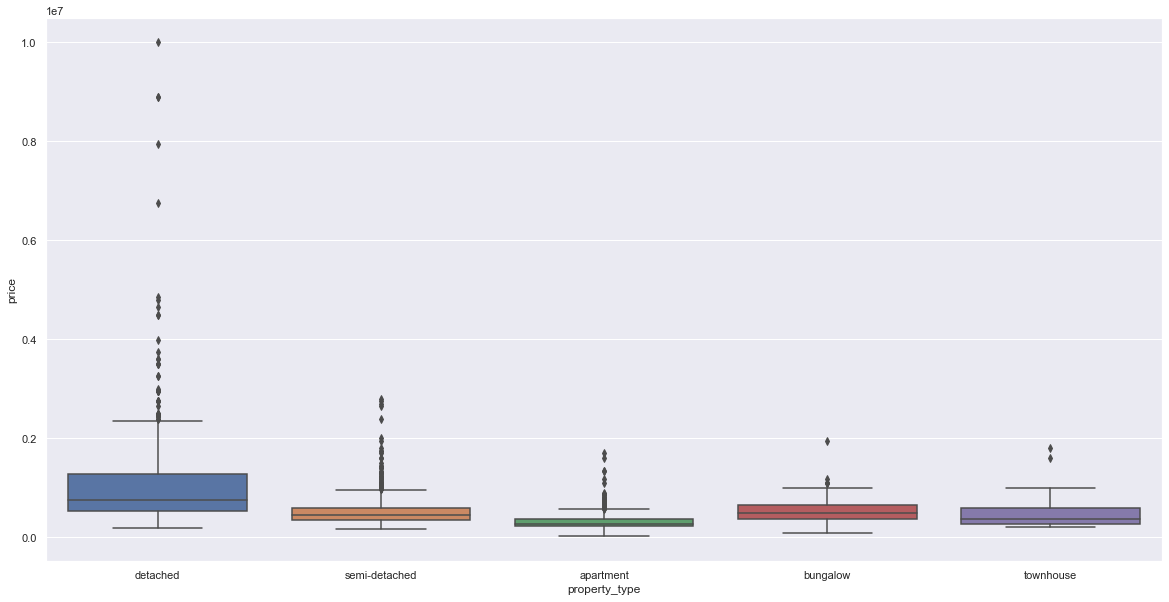

In [217]:
## Property Type comparisons
## splitting the dataframe into 2 groups of 5 property types for better boxplots
group1 = ['detached', 'semi-detached', 'apartment', 'townhouse', 'bungalow']
df1 = dftrain.loc[dftrain['property_type'].isin(group1)]

fig, axes = plt.subplots(1, figsize = (20,10), sharey=False)
sns.boxplot(x='property_type', y='price', data=df1)

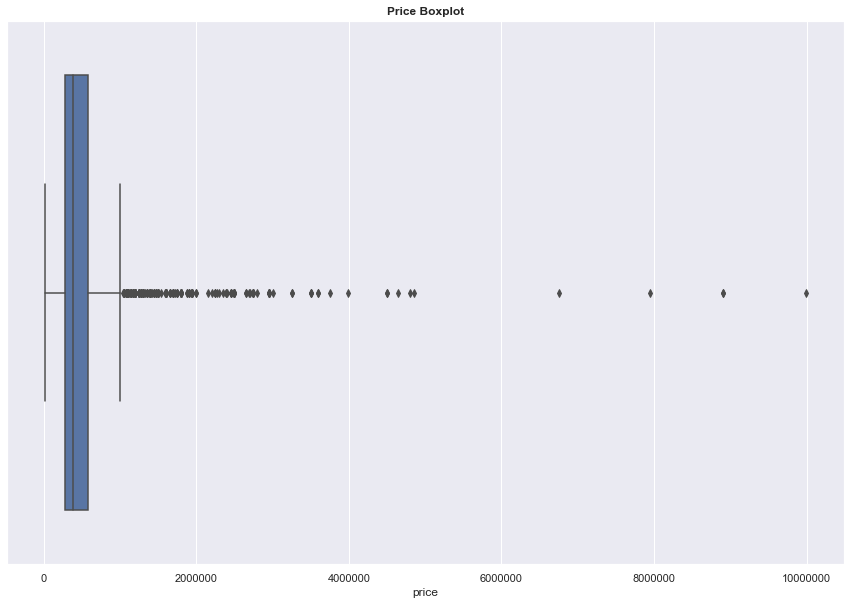

In [257]:
## from above we can see there are some outliers in the detached prices, lets look for outliers on the whole
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x=dftrain['price']).set_title('Price Boxplot', weight = 'bold')
plt.ticklabel_format(style='plain', axis='x',useOffset=False)


In [294]:
## using z score to find what rows have outliers
z = np.abs(stats.zscore(dfnum))
#print(np.where(z>3))

outliers = np.where(z>3)[0]
outliers = outliers.tolist()
outliers =  dftrain.iloc[outliers]

## most of the outliers tend to be related to longitude/latitude
outliers


,area,bathrooms,beds,ber_classification,facility,latitude,longitude,no_of_units,price,property_category,property_type,surface
ad_id,,,,,,,,,,,,
12119131,Balbriggan,3.0,3.0,NaN,"Parking,Gas Fired Central Heating,Alarm,Wired ...",53.62,-6.20,NaN,2.55e+05,sale,semi-detached,NaN
12250682,Balbriggan,3.0,3.0,C3,NaN,53.62,-6.20,NaN,2.60e+05,sale,semi-detached,101.0
12270559,Clondalkin,1.0,3.0,NaN,NaN,52.50,-1.74,NaN,1.99e+05,sale,semi-detached,79.0
12270559,Clondalkin,1.0,3.0,NaN,NaN,52.50,-1.74,NaN,1.99e+05,sale,semi-detached,79.0
12283542,Glenageary,2.0,4.0,F,NaN,51.46,-2.50,NaN,7.95e+05,sale,semi-detached,NaN
12283542,Glenageary,2.0,4.0,F,NaN,51.46,-2.50,NaN,7.95e+05,sale,semi-detached,NaN
12373796,Balbriggan,2.0,4.0,C3,"Parking,Gas Fired Central Heating,Alarm",53.62,-6.20,NaN,2.95e+05,sale,detached,125.0
12375974,Balbriggan,4.0,4.0,BER Exempt,"Parking,Alarm,Wired for Cable Television",53.63,-6.22,NaN,1.48e+06,sale,detached,641.0
12387701,Balbriggan,3.0,3.0,NaN,"Parking,Gas Fired Central Heating",53.62,-6.21,NaN,2.30e+05,sale,semi-detached,102.0


#### Some interesting Maps

In [296]:
## heatmap to see where houses are located
for_map = Map(location=[53.3498, -6.2603], zoom_start=10)

hm_wide = HeatMap(
    list(zip(dftrain['latitude'], dftrain['longitude'])),
    min_opacity=0.2,
    radius=17, 
    blur=15, 
    max_zoom=1,
)

title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format('Location Density Heat Map') 

for_map.get_root().html.add_child(folium.Element(title_html))

for_map.add_child(hm_wide)

for_map




In [245]:
## for mapping price we drop rows that have missing price (90 rows)
dfpricemap = dftrain[dftrain['price'].notnull()]

for_map2 = Map(location=[53.3498, -6.2603], zoom_start=10)

hm_wide2 = HeatMap(
    list(zip(dfpricemap['latitude'], dfpricemap['longitude'],dfpricemap['price'])),
    min_opacity=0.2,
    radius=17, 
    blur=15, 
    max_zoom=1,
)

title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format('Price Heat Map') 

for_map2.add_child(hm_wide2)

for_map2.get_root().html.add_child(folium.Element(title_html))

for_map2

for_map2.save('map2.html')

### Price Distribution Comparison (Real vs. Log)


 Price Distribution 
 count       2892.000000
mean      532353.590941
std       567814.769401
min        19995.000000
25%       280000.000000
50%       380000.000000
75%       575000.000000
max      9995000.000000
Name: price, dtype: object

 Log Price Distribution 
 count    2892.000000
mean       12.955946
std         0.598297
min         9.903238
25%        12.542545
50%        12.847927
75%        13.262125
max        16.117596
Name: log_price, dtype: object


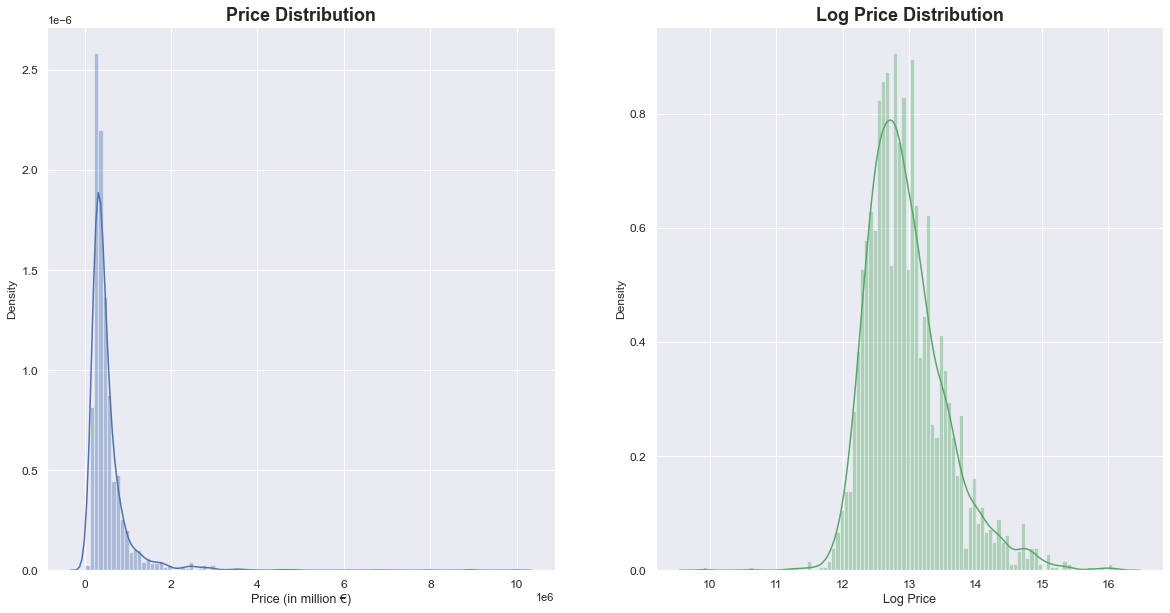

In [295]:
## Looking at the distribution of the price variable
print('\n','Price Distribution', '\n',dftrain['price'].describe().apply(lambda x: format(x, 'f')))

## log transorming price
dftrain['log_price'] = dftrain.price.apply(lambda x: math.log(x))

print('\n','Log Price Distribution', '\n',dftrain['log_price'].describe().apply(lambda x: format(x, 'f')))

## Creating plots
fig, axes = plt.subplots(1,2, figsize = (20,10), sharey=False)
sns.distplot(dftrain['price'], ax = axes[0], color='b', bins=100, hist_kws={'alpha': 0.4});
axes[0].set_title('Price Distribution', weight = 'bold').set_fontsize(18)
## formatting x axis 1
axes[0].ticklabel_format(style='sci', axis='x', scilimits=(6,6))
axes[0].tick_params(axis='x', labelsize=12.0)
axes[0].set_xlabel('Price (in million €)', fontsize = 12.5)
## formatting y axis 1
#axes[0].ticklabel_format(style='sci', axis='y', scilimits=(-6,-6))
axes[0].tick_params(axis='y', labelsize=12.0)


sns.distplot(dftrain['log_price'], ax = axes[1], color='g', bins=100, hist_kws={'alpha': 0.4});
axes[1].set_title('Log Price Distribution', weight = 'bold').set_fontsize(18)
## formatting x axis 2
axes[1].tick_params(axis='x', labelsize=12.0)
axes[1].set_xlabel('Log Price', fontsize = 12.5)
## formatting y axis 1
#axes[0].ticklabel_format(style='sci', axis='y', scilimits=(-6,-6))
axes[1].tick_params(axis='y', labelsize=12.0)
## log_price cuts down on the variance, may be easier to predict log price and take exponent of this to get real prediction.